## Feature Engineering 

#### Überblick
- Fehlende Werte (missing values)
- Categorical Encoding
- Ausreißer Handling
- Feature Scaling
- Feature Creation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import category_encoders as ce
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load Data
df = pd.read_hdf('Data/data3.0.h5',key='df')
# df_yield_params = pd.read_hdf(('Data/data3.0.h5',key='yields'))

In [4]:
# separate scale levels
metric_features = ['QUOTE_PRICE_ASK', 'SPREAD', 'COUPON', 'MATURITY_REMAINING', 'QUANTITY1', 'MID', 'PRICE','INTERBANK_POINTS','SALES_FEE']

ordinal_features=['BOND_RATING_MOODYS','COMPETITION_COUNT']

categorical_features =  ['CUSTOMER_USER', 'CUSTOMER_USER_ID', 'CUSTOMER_COMPANY', 'CUSTOMER_COMPANY_ID', 'CUSTOMER_GROUP','CUSTOMER_CLASSIFICATION',
                       'INSTRUMENT_IDENTIFIER', 'INSTRUMENT_GROUP_ID', 'INSTRUMENT_BOOK', 'MARKET_NAME','NOTIONAL_CURRENCY', 'SALES_GROUP', 'SALES_USER', 
                       'SECTOR','CUSTOMER_SUBACCOUNT_ID', 'CUSTOMER_COUNTRY', 'POPUP_REASON_EXISTS']

binary_features = ['POPUP_QUOTE_REFLEX_STATUS', 'POPUP_QUOTE_SIZE_EXCEEDED','POPUP_LIMIT_EXCEEDED', 'AXE_WAS_ACTIVE', 'LIQUID', 'SI','IS_CONSULTANCY']

y='TRADE'

### Missing Values

In [27]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

MID                          0.723453
COUPON                       0.644904
SI                           0.636597
LIQUID                       0.636597
AXE_WAS_ACTIVE               0.462204
CUSTOMER_GROUP               0.396370
SPREAD                       0.195852
PRICE                        0.124100
CUSTOMER_CLASSIFICATION      0.100430
QUANTITY1                    0.094077
QUOTE_PRICE_ASK              0.087745
BOND_RATING_MOODYS           0.087031
MARKET_NAME                  0.080520
INSTRUMENT_BOOK              0.031844
SECTOR                       0.011695
POPUP_LIMIT_EXCEEDED         0.008491
POPUP_QUOTE_REFLEX_STATUS    0.008491
POPUP_REASON_EXISTS          0.008491
POPUP_QUOTE_SIZE_EXCEEDED    0.008491
MATURITY_REMAINING           0.008466
NOTIONAL_CURRENCY            0.004778
INSTRUMENT_GROUP_ID          0.004026
SALES_GROUP                  0.002690
CUSTOMER_USER_ID             0.000564
CUSTOMER_COUNTRY             0.000033
CUSTOMER_COMPANY_ID          0.000004
CUSTOMER_COM

In [28]:
# replace missing values in categorical and ordinal features by -1

df[categorical_features+ordinal_features+binary_features] = df[categorical_features+ordinal_features+binary_features].fillna(-1)

# replace missing values in metric features by mean
for col in metric_features:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

In [29]:
# df.isna().sum()

### Categorical and Binary Feature Encoding

In [30]:
le = preprocessing.LabelEncoder()
for c in (categorical_features+binary_features):
    le.fit(df[c])
    df[c] = le.transform(df[c])
df[categorical_features]

,CUSTOMER_USER,CUSTOMER_USER_ID,CUSTOMER_COMPANY,CUSTOMER_COMPANY_ID,CUSTOMER_GROUP,CUSTOMER_CLASSIFICATION,INSTRUMENT_IDENTIFIER,INSTRUMENT_GROUP_ID,INSTRUMENT_BOOK,MARKET_NAME,NOTIONAL_CURRENCY,SALES_GROUP,SALES_USER,SECTOR,CUSTOMER_SUBACCOUNT_ID,CUSTOMER_COUNTRY,POPUP_REASON_EXISTS
341398,6925,7296,913,913,14,1,8900,4,15,4,3,58,0,7,1231,7,2
254717,3129,1205,576,576,3,2,8188,10,27,1,3,13,15,64,869,18,2
1154761,8805,558,687,687,3,1,8873,10,35,1,3,29,95,58,980,7,2
212899,6039,4812,927,927,5,0,7767,1,87,1,3,4,68,53,1247,14,2
1314406,5932,5300,634,634,3,8,6378,3,24,1,3,32,81,75,932,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243894,8747,5137,957,957,0,5,8609,14,18,6,3,8,88,59,1276,14,2
1417194,6911,3646,1355,1355,0,6,3594,8,102,0,3,35,45,37,1849,17,1
1356122,10186,6618,609,609,3,0,7375,2,100,1,3,36,47,44,905,19,2
779947,3272,6095,1165,1165,7,3,3638,3,12,5,3,16,41,41,674,13,2


### Ordinal Feature Encoding

In [31]:
df['BOND_RATING_MOODYS'].value_counts()

-1      20837
B2      20823
B3      20662
B1      20648
Aa2     19827
Aa1     19811
Aaa     19663
C1      13418
C       13218
Ca      13004
Caa3     8273
Caa2     8151
Caa1     8149
Ba3      6378
Ba2      6254
Ba1      6106
Baa2     2471
Baa1     2466
Baa3     2433
A3       2334
A2       2262
A1       2232
Name: BOND_RATING_MOODYS, dtype: int64

In [32]:
moodys_map = {
    **dict.fromkeys(['Aaa','Aa1','Aa2','Aa3'], 0), 
    **dict.fromkeys(['A1','A2','A3'], 1),
    **dict.fromkeys(['Baa1','Baa2','Baa3'], 2), 
    **dict.fromkeys(['Ba1','Ba2','Ba3'], 3), 
    **dict.fromkeys(['B1','B2','B3'], 4),
    **dict.fromkeys(['Caa1','Caa2','Caa3'], 5),
    **dict.fromkeys(['Ca','C1','C'], 6),
    -1:-1
}

df['BOND_RATING_MOODYS'] = df['BOND_RATING_MOODYS'].map(moodys_map)

In [33]:
df['BOND_RATING_MOODYS'].value_counts()

 4    62133
 0    59301
 6    39640
 5    24573
-1    20837
 3    18738
 2     7370
 1     6828
Name: BOND_RATING_MOODYS, dtype: int64

In [34]:
df['COMPETITION_COUNT'].value_counts()

5     77507
6     56280
4     20246
9     19828
3     14526
1     10740
2      8195
8      8140
7      7519
15     6022
10     3266
12     2575
11     1820
13     1372
14     1313
0        71
Name: COMPETITION_COUNT, dtype: int64

### Behandlung von Ausreißern

In [35]:
def removeOutliners(ft,val):
    ft.clip(np.percentile(ft,val), np.percentile(ft,100-val), inplace=True)
    return ft

for col in metric_features:
    df[col] = removeOutliners(df[col],1)

### Metric Feature Scaling

In [36]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[metric_features]) 
df[metric_features]=scaled_values

## Feature Creation

### Dynamische Häufigkeitsattribute 

- REQUEST_FREQUENCY_USER / REQUEST_FREQUENCY_COMPANY

Häufigkeit der Anfragen eines Nutzers/Unternehmens zu Zeitpunkt t

- TRADE_FREQUENCY_USER / TRADE_FREQUENCY_COMPANY

Häufigkeit der Trades eines Nutzers/Unternehmens zu Zeitpunkt t 

- TRADE_RATIO_CUSTOMER_USER / TRADE_RATIO_CUSTOMER_COMPANY

Relative Tradehäufigkeit eines Nutzers/Unternehmens zu Zeitpunkt t 

### Statische Aggregationsattribute

- CUSTOMER_USER_AVERAGE_PRICE / CUSTOMER_COMPANY_AVERAGE_PRICE

Durchschnittlicher Preis bei Verhandlungen

- CUSTOMER_USER_AVERAGE_SPREAD / CUSTOMER_COMPANY_AVERAGE_SPREAD

Durchschnittlicher SPREAD bei Verhandlungen

- CUSTOMER_USER_AVERAGE_TRADE_PRICE / CUSTOMER_COMPANY_AVERAGE_TRADE_PRICE

Durchschnittlicher Preis bei erfolgreichen Verhandlungen

- CUSTOMER_USER_AVERAGE_TRADE_SPREAD / CUSTOMER_COMPANY_AVERAGE_TRADE_SPREAD

Durchschnittlicher SPREAD bei erfolgreichen Verhandlungen

In [37]:
# order samples to calculate user specific features
df=df.sort_values(['CUSTOMER_USER_ID','ID'])

# generate request frequencies
df['REQUEST_FREQUENCY_USER'] = df[['ID', 'CUSTOMER_USER_ID', 'TRADE']].sort_values(by='ID').groupby('CUSTOMER_USER_ID').apply(lambda x: x.reset_index()).index.get_level_values(level=1)

# generate trade frequency
df['TRADE_FREQUENCY_USER'] = df[['ID', 'CUSTOMER_USER_ID', 'TRADE']].sort_values(by='ID').groupby('CUSTOMER_USER_ID')['TRADE'].apply(lambda x: pd.Series(x.cumsum()).shift(periods=1, fill_value=0))

# calculate trade ratio from request and trade freq
df['TRADE_RATIO_CUSTOMER_USER'] = (df['TRADE_FREQUENCY_USER'].div(df['REQUEST_FREQUENCY_USER'])).fillna(0.2)

# order samples to calculate company specific features
df=df.sort_values(['CUSTOMER_COMPANY','ID'])

# generate request frequency
df['REQUEST_FREQUENCY_COMPANY'] =  df[['ID', 'CUSTOMER_COMPANY', 'TRADE']].sort_values(by='ID').groupby('CUSTOMER_COMPANY').apply(lambda x: x.reset_index()).index.get_level_values(level=1)

# generate trade frequency
df['TRADE_FREQUENCY_COMPANY'] = df[['ID', 'CUSTOMER_COMPANY', 'TRADE']].sort_values(by='ID').groupby('CUSTOMER_COMPANY')['TRADE'].apply(lambda x: pd.Series(x.cumsum()).shift(periods=1, fill_value=0))

# calculate trade ratio from request and trade freq
df['TRADE_RATIO_CUSTOMER_COMPANY'] = (df['TRADE_FREQUENCY_COMPANY'].div(df['REQUEST_FREQUENCY_COMPANY'])).fillna(0.2)

engineered_features = ['REQUEST_FREQUENCY_USER','TRADE_FREQUENCY_USER','TRADE_RATIO_CUSTOMER_USER',
                       'REQUEST_FREQUENCY_COMPANY','TRADE_FREQUENCY_COMPANY','TRADE_RATIO_CUSTOMER_COMPANY' ]

In [38]:
df[['CUSTOMER_USER_ID','TRADE','REQUEST_FREQUENCY_USER','TRADE_FREQUENCY_USER','TRADE_RATIO_CUSTOMER_USER']].sort_index().groupby('CUSTOMER_USER_ID').get_group(3662)

,CUSTOMER_USER_ID,TRADE,REQUEST_FREQUENCY_USER,TRADE_FREQUENCY_USER,TRADE_RATIO_CUSTOMER_USER
15072,3662,0,0,0,0.200000
135561,3662,0,1,0,0.000000
239547,3662,0,2,0,0.000000
490782,3662,0,3,0,0.000000
492173,3662,0,4,0,0.000000
527142,3662,0,5,0,0.000000
627253,3662,0,6,0,0.000000
713242,3662,0,7,0,0.000000
1224978,3662,1,8,0,0.000000
1236003,3662,1,9,1,0.111111


In [39]:
df[['ID','CUSTOMER_COMPANY_ID','TRADE','REQUEST_FREQUENCY_COMPANY','TRADE_FREQUENCY_COMPANY','TRADE_RATIO_CUSTOMER_COMPANY']].sort_values(by='ID').groupby('CUSTOMER_COMPANY_ID').get_group(1515)

,ID,CUSTOMER_COMPANY_ID,TRADE,REQUEST_FREQUENCY_COMPANY,TRADE_FREQUENCY_COMPANY,TRADE_RATIO_CUSTOMER_COMPANY
53036,123036,1515,0,0,0,0.200000
125589,195589,1515,0,1,0,0.000000
160315,230315,1515,0,2,0,0.000000
162885,232885,1515,1,3,0,0.000000
359529,429529,1515,0,4,1,0.250000
381432,451432,1515,0,5,1,0.200000
423836,493836,1515,0,6,1,0.166667
564930,634930,1515,0,7,1,0.142857
567395,637395,1515,0,8,1,0.125000
619637,689637,1515,0,9,1,0.111111


In [40]:
df.drop('ID', axis=1, inplace=True)

In [21]:
user_features = ['CUSTOMER_USER_AVERAGE_PRICE', 'CUSTOMER_USER_AVERAGE_SPREAD', 
            'CUSTOMER_USER_AVERAGE_TRADE_PRICE','CUSTOMER_USER_AVERAGE_TRADE_SPREAD']
company_features = ['CUSTOMER_COMPANY_AVERAGE_PRICE', 'CUSTOMER_COMPANY_AVERAGE_SPREAD', 
                    'CUSTOMER_COMPANY_AVERAGE_TRADE_PRICE','CUSTOMER_COMPANY_AVERAGE_TRADE_SPREAD']
    
    
def create_static_attributes(x_train, x_test):
    features = {'user': user_features,
           'company': company_features}
    
    lookup = {}
    for g in (['user', 'company']):

        col = 'CUSTOMER_' + g.upper()
        monetary = col + '_AVERAGE_PRICE'
        spread = col+ '_AVERAGE_SPREAD'
        trade_monetary = col + '_AVERAGE_TRADE_PRICE'
        trade_spread = col + '_AVERAGE_TRADE_SPREAD'

        # calculate for every user/company, average trade price 

        trade_monetary_dict = x_train[[col, 'PRICE']].loc[y_train[y_train==1].index].groupby(col).mean().to_dict()['PRICE']
        trade_spread_dict = x_train[[col, 'SPREAD']].loc[y_train[y_train==1].index].groupby(col).mean().to_dict()['SPREAD']

        # append new attributes

        x_train[monetary] = x_train[[col, 'PRICE']].groupby(by=col).transform('mean')
        x_train[spread] = x_train[[col, 'SPREAD']].groupby(by=col).transform('mean')
        x_train[trade_monetary] = x_train[col].map(trade_monetary_dict).fillna(0)
        x_train[trade_spread] = x_train[col].map(trade_spread_dict).fillna(0)

        # create lookup
        values = x_train[[col]+features[g]].groupby(col).first()
        lookup[col] = dict(zip(values.index, values.values))

        # map test values 
        mapped_values = x_test[col].map(lookup[col])
        mapped_values = mapped_values.loc[mapped_values.notna()]
        mapped_df = pd.DataFrame({0: [x[0] for x in mapped_values.values], 1: [x[1] for x in mapped_values.values], 
                                  2: [x[2] for x in mapped_values.values], 3: [x[3] for x in mapped_values.values]}, mapped_values.index)
        x_test[[monetary,spread, trade_monetary,trade_spread]] = mapped_df
        x_test[[monetary,spread, trade_monetary,trade_spread]] = x_test[[monetary,spread, trade_monetary,trade_spread]].fillna(0)
        #x_test[monetary] = [x[0] for x in mapped_values.values[0]]

### Evaluation

In [41]:
# we wanna evaluate the influence of our created features
# therefore we compare the performance of our model without created features,
# with all created features and with each created feature individually

engineered_features.extend(user_features+company_features)
print(engineered_features)
accuracies = []
for i in range(10):

    # train test split
    X = df.drop('TRADE', axis=1)
    y = df['TRADE']
    x_train, x_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.33)
    create_static_attributes(x_train, x_test)

    # encode categorical features with catboost
    encoder = ce.CatBoostEncoder(cols=(categorical_features+binary_features+ordinal_features))
    encoder.fit(x_train, y_train)
    x_train_encoded = encoder.transform(x_train)
    x_test_encoded = encoder.transform(x_test)

    # init help variables
    results = {}
    counter = 0
    pre_engineering_features = [x for x in x_train.columns if x not in engineered_features]

    # init random Forest parameters
    rf_criterion = 'entropy'
    rf_max_depth = 10
    rf_n_estimators = 50

    # apply subsets to Random Forest
    for feature in ([engineered_features,[]]+engineered_features):
        print(f'Subset: {feature}')
        if (type(feature)==list):
            x_train_selection = x_train_encoded[pre_engineering_features+feature]
            x_test_selection = x_test_encoded[pre_engineering_features+feature]
        else:
            x_train_selection = x_train_encoded[pre_engineering_features+[feature]]
            x_test_selection = x_test_encoded[pre_engineering_features+[feature]]

        model = RandomForestClassifier(bootstrap=True,
                                                criterion=rf_criterion,
                                                max_depth=rf_max_depth,
                                                n_estimators=rf_n_estimators,
                                                random_state=None,
                                                verbose=0,
                                                warm_start=False)

        # train model and get predictions
        model.fit(x_train_selection, y_train)
        preds_class = model.predict(x_test_selection) 

        # eval model and save results
        accuracy = round(accuracy_score(y_test, preds_class),2)
        if counter < len(accuracies):
            accuracies[counter].append(accuracy)
        else:
            accuracies.append([accuracy])
        counter +=1
    print(f'{i}th Iteration Done')

['REQUEST_FREQUENCY_USER', 'TRADE_FREQUENCY_USER', 'TRADE_RATIO_CUSTOMER_USER', 'REQUEST_FREQUENCY_COMPANY', 'TRADE_FREQUENCY_COMPANY', 'TRADE_RATIO_CUSTOMER_COMPANY', 'CUSTOMER_USER_AVERAGE_PRICE', 'CUSTOMER_USER_AVERAGE_SPREAD', 'CUSTOMER_USER_AVERAGE_TRADE_PRICE', 'CUSTOMER_USER_AVERAGE_TRADE_SPREAD', 'CUSTOMER_COMPANY_AVERAGE_PRICE', 'CUSTOMER_COMPANY_AVERAGE_SPREAD', 'CUSTOMER_COMPANY_AVERAGE_TRADE_PRICE', 'CUSTOMER_COMPANY_AVERAGE_TRADE_SPREAD']
Subset: ['REQUEST_FREQUENCY_USER', 'TRADE_FREQUENCY_USER', 'TRADE_RATIO_CUSTOMER_USER', 'REQUEST_FREQUENCY_COMPANY', 'TRADE_FREQUENCY_COMPANY', 'TRADE_RATIO_CUSTOMER_COMPANY', 'CUSTOMER_USER_AVERAGE_PRICE', 'CUSTOMER_USER_AVERAGE_SPREAD', 'CUSTOMER_USER_AVERAGE_TRADE_PRICE', 'CUSTOMER_USER_AVERAGE_TRADE_SPREAD', 'CUSTOMER_COMPANY_AVERAGE_PRICE', 'CUSTOMER_COMPANY_AVERAGE_SPREAD', 'CUSTOMER_COMPANY_AVERAGE_TRADE_PRICE', 'CUSTOMER_COMPANY_AVERAGE_TRADE_SPREAD']
Subset: []
Subset: REQUEST_FREQUENCY_USER
Subset: TRADE_FREQUENCY_USER
Subset: T

In [42]:
import csv
with open("ft_engineering_accuracies.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(accuracies)

In [12]:
accuracies = list(csv.reader(open('ft_engineering_accuracies.csv'),quoting=csv.QUOTE_NONNUMERIC))

engineered_features = ['REQUEST_FREQUENCY_USER','TRADE_FREQUENCY_USER','TRADE_RATIO_CUSTOMER_USER',
                       'REQUEST_FREQUENCY_COMPANY','TRADE_FREQUENCY_COMPANY','TRADE_RATIO_CUSTOMER_COMPANY' ]

user_features = ['USER_AVERAGE_PRICE', 'USER_AVERAGE_SPREAD', 
                'USER_AVERAGE_TRADE_PRICE','USER_AVERAGE_TRADE_SPREAD']
company_features = ['COMPANY_AVERAGE_PRICE', 'COMPANY_AVERAGE_SPREAD', 
                    'COMPANY_AVERAGE_TRADE_PRICE','COMPANY_AVERAGE_TRADE_SPREAD']
engineered_features.extend(user_features+company_features)

In [13]:
# calculate means
meaned_accuracies = np.mean(accuracies, axis=1)

# select result of runs without engineered features
without_eng_features = meaned_accuracies[1]
meaned_accuracies = np.delete(meaned_accuracies, 1)

# calculate change in accuracy for each engineered feature 
evaluated_features = ['ALL TOGETHER']+engineered_features
feature_performance = dict(zip(evaluated_features, (meaned_accuracies-without_eng_features)*100))
feature_performance = sorted(feature_performance.items(), key=lambda x: x[1], reverse=False)
features, values = [i[0] for i in feature_performance] , [i[1] for i in feature_performance] 

In [14]:
features = list(features)

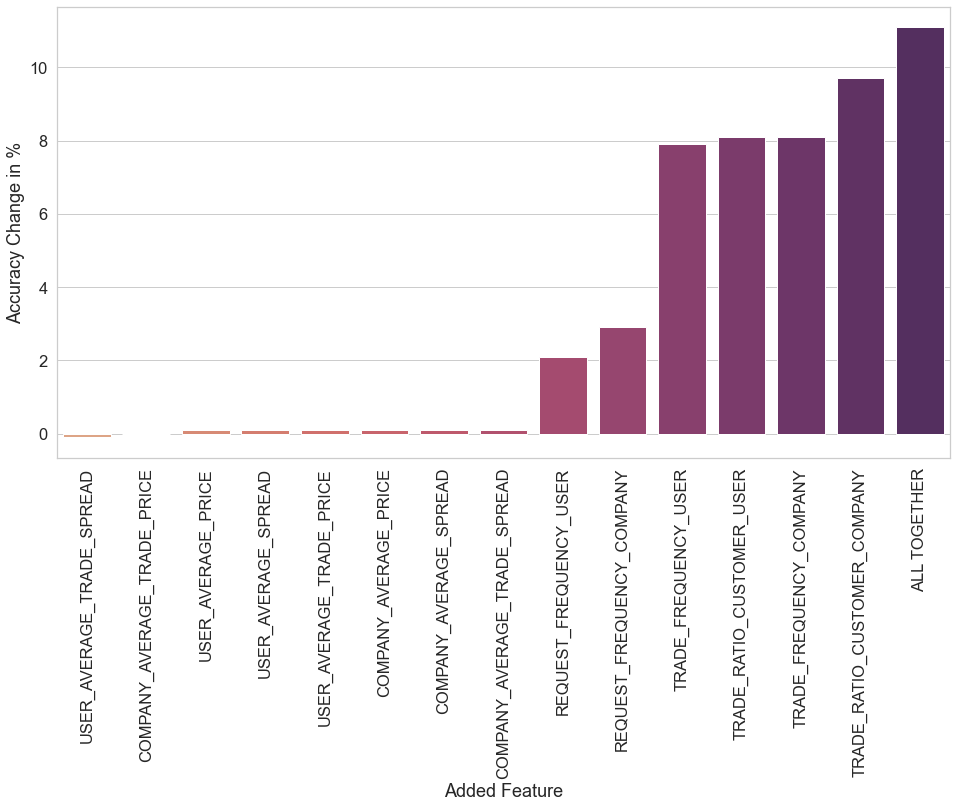

In [15]:
# plot results
sns.set_theme(style="whitegrid", font_scale = 1.5)
plt.subplots(figsize=(16, 8.3))
ticks = plt.xticks(rotation=90)
plt.xlabel('Added Feature')
plt.ylabel('Accuracy Change in %')
change_in_accuracy = sns.barplot(x=features, y=values, palette='flare')
plot = change_in_accuracy.get_figure()
plot.savefig("Pictures/Feature Engineering Eval.png",bbox_inches='tight')

In [60]:
features_to_keep = [x for x in list(k for k, v in dict(feature_performance).items() if v > 0.5) if x != 'ALL TOGETHER']
features_to_remove =[x for x in engineered_features if x not in features_to_keep]
metric_features.extend(features_to_keep)
x_train.drop(features_to_remove, axis = 1, inplace=True)
x_test.drop(features_to_remove, axis = 1, inplace=True)

In [61]:
features_to_keep

['REQUEST_FREQUENCY_USER',
 'REQUEST_FREQUENCY_COMPANY',
 'TRADE_FREQUENCY_USER',
 'TRADE_RATIO_CUSTOMER_USER',
 'TRADE_FREQUENCY_COMPANY',
 'TRADE_RATIO_CUSTOMER_COMPANY']

In [59]:
features_to_remove

['CUSTOMER_USER_AVERAGE_PRICE',
 'CUSTOMER_USER_AVERAGE_SPREAD',
 'CUSTOMER_USER_AVERAGE_TRADE_PRICE',
 'CUSTOMER_USER_AVERAGE_TRADE_SPREAD',
 'CUSTOMER_COMPANY_AVERAGE_PRICE',
 'CUSTOMER_COMPANY_AVERAGE_SPREAD',
 'CUSTOMER_COMPANY_AVERAGE_TRADE_PRICE',
 'CUSTOMER_COMPANY_AVERAGE_TRADE_SPREAD']